In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Load data

#### Load language pairs with scores

In [3]:
pair_scores = pd.read_csv("ner_lang_pair_scores.csv")

In [4]:
pair_scores.to_excel("Language pairs scores.xlsx")

In [5]:
pair_scores.head()

,train_lang,test_lang,acc,f1
0,af,af,0.978337,0.913753
1,af,ar,0.793688,0.546847
2,af,bg,0.903963,0.766965
3,af,bn,0.709012,0.561632
4,af,de,0.921272,0.731704


Consider two languages L1 and L2. The difference in performance between training on L1 and testing on L2 can be sometimes enormous compared to training on L2 and testing on L1, even for supposedly similar languages. <br>
Create a table with those differences. The current code produces a table with duplicates, this does not have an impact on the mean/median and is useful in later cells. If you want to create a table without duplicates, replace the line `if lang1 != lang2:` with `if pos_langs.index(lang1)<pos_langs.index(lang2):`.

In [6]:
pos_langs = list(pair_scores.train_lang.unique())
pair_diff = {'lang1':[], 'lang2':[], 'diff':[]}
pairs_used = set()
for lang1 in pos_langs:
    for lang2 in pos_langs:
        if lang1!=lang2:
            lang1_lang2 = pair_scores[(pair_scores.train_lang==lang1)&(pair_scores.test_lang==lang2)].iat[0,2] # accuracy
            lang2_lang1 = pair_scores[(pair_scores.train_lang==lang2)&(pair_scores.test_lang==lang1)].iat[0,2] # accuracy
            diff = np.abs(lang1_lang2-lang2_lang1)
#             print("Lang 1: {} Lang 2: {} Acc 1: {} Acc 2: {} Diff: {}".format(lang1, lang2, lang1_lang2, lang2_lang1, diff))
            pair_diff['lang1'].append(lang1)
            pair_diff['lang2'].append(lang2)
            pair_diff['diff'].append(diff)

pair_diff = pd.DataFrame.from_dict(pair_diff)
pair_diff.head()

,lang1,lang2,diff
0,af,ar,0.112040
1,af,bg,0.010853
2,af,bn,0.150085
3,af,de,0.007466
4,af,el,0.009789


On average, the difference in accuracy between L1 -> L2 and L2 -> L1 is 9%

In [7]:
pair_diff['diff'].median(),pair_diff['diff'].mean()

(0.06628495836803844, 0.09106727515745819)

In [8]:
pair_diff.shape

(1332, 3)

See pairs with the largest distance.

In [9]:
pair_diff.sort_values(by='diff', ascending=False)

,lang1,lang2,diff
903,my,bn,0.657806
132,bn,my,0.657806
1249,ur,my,0.540180
933,my,ur,0.540180
932,my,tl,0.527444
1213,tl,my,0.527444
1285,vi,my,0.456307
934,my,vi,0.456307
910,my,fa,0.450763
384,fa,my,0.450763


See languages with the largest average difference

In [11]:
pair_diff.groupby(by='lang1').mean()['diff'].sort_values(ascending=False)

lang1
my    0.263003
th    0.149286
id    0.148012
tl    0.147775
ms    0.125111
fa    0.123115
ar    0.110509
vi    0.108159
bg    0.106653
bn    0.105010
de    0.101335
ja    0.093350
el    0.092276
sw    0.089198
hu    0.082955
ru    0.082528
ur    0.082153
en    0.080671
zh    0.079083
fi    0.077659
te    0.076996
ka    0.076937
af    0.075623
he    0.073790
ko    0.073653
ta    0.072791
fr    0.068896
et    0.068037
nl    0.067042
pt    0.066844
mr    0.065168
es    0.064572
it    0.057319
hi    0.054608
kk    0.054563
eu    0.052464
ml    0.052345
Name: diff, dtype: float64

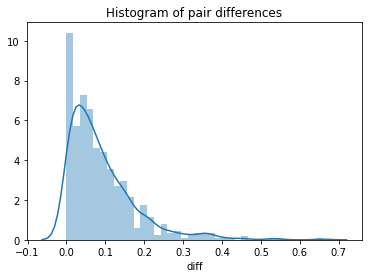

In [12]:
sns.distplot(pair_diff['diff'])
plt.title("Histogram of pair differences")
plt.show()

Average train language performance

In [13]:
pair_scores.groupby(by='train_lang').mean()['acc'].sort_values()

train_lang
my    0.549846
th    0.592936
zh    0.771201
ru    0.773920
ja    0.774146
fa    0.775051
ta    0.780198
bn    0.781050
sw    0.781348
te    0.784379
de    0.784381
bg    0.787850
he    0.789126
tl    0.790452
ko    0.791503
ur    0.800205
kk    0.800994
ka    0.804215
el    0.806469
en    0.808012
mr    0.808845
ar    0.813785
ms    0.815067
ml    0.818009
af    0.822330
hi    0.822398
es    0.822911
hu    0.824353
pt    0.824525
fi    0.826188
et    0.826969
nl    0.830694
fr    0.830762
eu    0.832203
it    0.832527
id    0.833735
vi    0.837704
Name: acc, dtype: float64

Average test language performance

In [14]:
pair_scores.groupby(by='test_lang').mean()['acc'].sort_values()

test_lang
yo    0.476317
th    0.508614
tl    0.655096
fa    0.684094
id    0.696029
bn    0.715494
ms    0.717490
ja    0.725852
ar    0.732925
sw    0.735189
vi    0.741140
ur    0.745913
jv    0.756110
zh    0.757828
en    0.786685
hi    0.800699
pt    0.808088
my    0.812047
es    0.815794
ko    0.816851
he    0.817125
ru    0.818094
fr    0.821204
ta    0.823730
kk    0.837902
mr    0.843971
ml    0.851234
it    0.853727
te    0.858332
eu    0.863184
ka    0.869739
tr    0.869985
nl    0.876187
et    0.878194
bg    0.887798
de    0.889926
fi    0.890877
el    0.895438
af    0.896114
hu    0.899027
Name: acc, dtype: float64

In [15]:
def check_transfer(x):
    return x[x.train_lang==x.test_lang]['acc'].values[0]-x.mean()['acc']
pair_scores.groupby(by='train_lang').apply(check_transfer).sort_values()

train_lang
fr    0.119883
en    0.121212
vi    0.121563
hi    0.123022
ja    0.125669
es    0.127578
pt    0.129432
it    0.133363
ml    0.133877
id    0.135593
nl    0.140320
eu    0.142037
ar    0.143239
fi    0.144898
et    0.149331
mr    0.151212
hu    0.152593
te    0.153987
af    0.156007
kk    0.156464
sw    0.158392
ka    0.160829
zh    0.162270
ms    0.166355
he    0.168055
ko    0.168354
el    0.168586
ta    0.177570
tl    0.181826
de    0.185365
ru    0.186324
ur    0.187462
bg    0.188054
my    0.189896
fa    0.195859
bn    0.197395
th    0.320730
dtype: float64

##### Pair-wise comparison performance of Chinese, English and German

In [22]:
pair_scores[(pair_scores['train_lang'].isin(['en','de','zh']))&(pair_scores['test_lang'].isin(['en','de','zh']))].sort_values(by='acc',ascending=False)

,train_lang,test_lang,acc,f1
164,de,de,0.969746,0.889378
1479,zh,zh,0.933471,0.767735
246,en,en,0.929224,0.834677
244,en,de,0.921476,0.746864
1444,zh,de,0.883186,0.602885
166,de,en,0.778298,0.566451
1446,zh,en,0.767905,0.481156
279,en,zh,0.690484,0.251656
199,de,zh,0.688317,0.277406


Linguistic similarity (how many features each language has in common)

In [23]:
similarities_df = pd.read_excel("../../lang_similarities.xlsx",index_col=0)

In [24]:
similarities_df.head()

,af,ar,bg,bn,de,el,en,es,et,eu,fa,fi,fr,he,hi,hu,id,it,ja,jv,ka,kk,ko,ml,mr,ms,my,nl,pt,ru,sw,ta,te,th,tl,tr,ur,vi,yo,zh
ISO 693-1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
af,1.000000,0.734104,0.572254,0.774566,0.265896,0.248555,0.254335,0.242775,0.635838,0.271676,0.283237,0.277457,0.236994,0.283237,0.265896,0.265896,0.289017,0.549133,0.248555,0.895954,0.265896,0.895954,0.260116,0.606936,0.566474,0.913295,0.283237,0.508671,0.676301,0.236994,0.317919,0.549133,0.641618,0.312139,0.312139,0.254335,0.693642,0.265896,0.300578,0.265896
ar,0.734104,1.000000,0.641618,0.693642,0.225434,0.317919,0.242775,0.283237,0.716763,0.248555,0.271676,0.271676,0.260116,0.294798,0.312139,0.254335,0.289017,0.606936,0.219653,0.763006,0.260116,0.780347,0.248555,0.566474,0.589595,0.820809,0.283237,0.526012,0.710983,0.265896,0.312139,0.514451,0.693642,0.346821,0.323699,0.236994,0.780347,0.317919,0.312139,0.242775
bg,0.572254,0.641618,1.000000,0.612717,0.358382,0.520231,0.468208,0.485549,0.803468,0.335260,0.387283,0.479769,0.421965,0.445087,0.375723,0.427746,0.410405,0.653179,0.277457,0.572254,0.364162,0.595376,0.312139,0.520231,0.479769,0.589595,0.277457,0.595376,0.728324,0.497110,0.433526,0.479769,0.578035,0.456647,0.346821,0.329480,0.624277,0.439306,0.410405,0.387283
bn,0.774566,0.693642,0.612717,1.000000,0.254335,0.231214,0.225434,0.225434,0.606936,0.306358,0.329480,0.248555,0.231214,0.271676,0.393064,0.260116,0.236994,0.456647,0.300578,0.768786,0.346821,0.768786,0.306358,0.635838,0.601156,0.797688,0.364162,0.543353,0.606936,0.242775,0.294798,0.583815,0.699422,0.312139,0.277457,0.335260,0.670520,0.289017,0.283237,0.236994
de,0.265896,0.225434,0.358382,0.254335,1.000000,0.601156,0.653179,0.612717,0.306358,0.445087,0.473988,0.560694,0.653179,0.514451,0.491329,0.508671,0.433526,0.473988,0.433526,0.202312,0.468208,0.219653,0.473988,0.265896,0.329480,0.208092,0.369942,0.560694,0.387283,0.670520,0.404624,0.300578,0.289017,0.398844,0.364162,0.450867,0.300578,0.369942,0.427746,0.445087


In [25]:
def foo(x):
    return similarities_df.at[x['train_lang'],x['test_lang']]
pair_scores['similarity'] = pair_scores.apply(lambda x:foo(x),axis=1)

In [26]:
pair_scores

,train_lang,test_lang,acc,f1,similarity
0,af,af,0.978337,0.913753,1.000000
1,af,ar,0.793688,0.546847,0.734104
2,af,bg,0.903963,0.766965,0.572254
3,af,bn,0.709012,0.561632,0.774566
4,af,de,0.921272,0.731704,0.265896
5,af,el,0.915307,0.738315,0.248555
6,af,en,0.812121,0.611612,0.254335
7,af,es,0.854964,0.742525,0.242775
8,af,et,0.919780,0.763123,0.635838
9,af,eu,0.914687,0.680531,0.271676


In [27]:
pair_scores[['acc','similarity']].corr()

,acc,similarity
acc,1.000000,0.179429
similarity,0.179429,1.000000


Which pairs have high similarity but surprsingly low accuracy?

In [28]:
pair_scores['surprise'] = pair_scores['similarity']-pair_scores['acc']

In [29]:
pair_scores.sort_values(by='surprise',ascending=False)

,train_lang,test_lang,acc,f1,similarity,surprise
1318,th,yo,0.306748,0.099448,0.664740,0.357991
1317,th,vi,0.446015,0.123295,0.797688,0.351672
553,he,th,0.263275,0.045505,0.601156,0.337881
273,en,th,0.252685,0.032868,0.560694,0.308008
473,fi,th,0.291274,0.031335,0.583815,0.292541
1433,vi,th,0.514221,0.050441,0.797688,0.283467
1026,my,my,0.739742,0.038961,1.000000,0.260258
1193,sw,th,0.293474,0.032901,0.549133,0.255659
825,kk,ms,0.712800,0.412256,0.953757,0.240957
673,id,th,0.484328,0.013883,0.710983,0.226654


In [30]:
pair_scores[pair_scores.train_lang=="de"].sort_values(by='acc')

,train_lang,test_lang,acc,f1,similarity,surprise
193,de,th,0.290674,0.032522,0.398844,0.108170
198,de,yo,0.517382,0.266094,0.427746,-0.089637
170,de,fa,0.648091,0.411056,0.473988,-0.174103
176,de,id,0.663673,0.457524,0.433526,-0.230147
178,de,ja,0.668742,0.233213,0.433526,-0.235216
199,de,zh,0.688317,0.277406,0.445087,-0.243231
186,de,my,0.699883,0.465839,0.369942,-0.329941
194,de,tl,0.707355,0.580587,0.364162,-0.343193
179,de,jv,0.716239,0.524194,0.202312,-0.513927
190,de,sw,0.725085,0.524459,0.404624,-0.320460


In [31]:
pair_scores[pair_scores.test_lang=="en"].sort_values(by='acc')

,train_lang,test_lang,acc,f1,similarity,surprise
1006,my,en,0.507612,0.004442,0.387283,-0.120328
1286,th,en,0.564977,0.128466,0.560694,-0.004284
1206,ta,en,0.677573,0.398543,0.312139,-0.365434
406,fa,en,0.701463,0.413377,0.485549,-0.215914
526,he,en,0.739955,0.507529,0.676301,-0.063654
1246,te,en,0.747169,0.473703,0.277457,-0.469712
86,bg,en,0.753725,0.542180,0.468208,-0.285517
766,ka,en,0.758158,0.488180,0.491329,-0.266828
846,ko,en,0.759698,0.514796,0.502890,-0.256807
1126,ru,en,0.760045,0.505279,0.751445,-0.008600


In [32]:
pair_scores[pair_scores.test_lang=="af"].sort_values(by='acc',ascending=False)

,train_lang,test_lang,acc,f1,similarity,surprise
0,af,af,0.978337,0.913753,1.000000,0.021663
1040,nl,af,0.952910,0.844211,0.508671,-0.444239
680,it,af,0.941803,0.822539,0.549133,-0.392670
600,hu,af,0.941068,0.803542,0.265896,-0.675173
440,fi,af,0.940059,0.797662,0.277457,-0.662602
640,id,af,0.935653,0.805501,0.289017,-0.646635
320,et,af,0.932532,0.779279,0.635838,-0.296694
360,eu,af,0.930053,0.778497,0.271676,-0.658377
200,el,af,0.925096,0.753633,0.248555,-0.676541
960,ms,af,0.921975,0.768164,0.913295,-0.008681


In [33]:
def get_best_lang(x):
    return x.at[x['acc'].idxmax(),"train_lang"]
best_train_langs = pair_scores[pair_scores.train_lang!=pair_scores.test_lang].groupby(by="test_lang").apply(get_best_lang)

In [34]:
best_train_langs = best_train_langs.reset_index().rename(columns={0:"best_train_lang"})

In [35]:
best_train_langs

,test_lang,best_train_lang
0,af,nl
1,ar,fa
2,bg,ru
3,bn,ta
4,de,nl
5,el,it
6,en,id
7,es,fr
8,et,fi
9,eu,hu


Anomalies: fr -> bg, de -> el, it->en, ur -> eu ?, ru -> fa, fi -> he, nl -> hu, en -> id, zh -> ja (?), eu -> ko, de -> mr, et -> ta !, en -> te, hi-> tr, fr -> vi, ja -> zh

In [36]:
xtreme_langs = pd.read_excel("../../xtreme_langs_wals.xlsx")

In [37]:
xtreme_langs[['ISO 693-1','Name']].to_excel("Language codes.xlsx",index=False)

In [38]:
best_train_langs.to_excel("Best train languages.xlsx",index=False)